**Understanding the Data and Initial Analysis**

.

**Data Import and Initial Exploration**

In [12]:
#Load the dataset into a Pandas DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the data
kiva_data = pd.read_csv("/content/kiva_loans.csv")

**Exploratory Data Analysis** (EDA)

 Understand the data structure, identify missing values, outliers, and potential cleaning steps.

In [34]:

 # View the first few rows
data.head()


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


**Data Exploration**:
Familiarize  with the dataset structure, variables, and data quality.
Identify potential data cleaning or preprocessing steps needed

In [35]:
# Get information about columns and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69719 entries, 0 to 69718
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69719 non-null  int64  
 1   funded_amount       69719 non-null  float64
 2   loan_amount         69719 non-null  float64
 3   activity            69719 non-null  object 
 4   sector              69719 non-null  object 
 5   use                 68782 non-null  object 
 6   country_code        69719 non-null  object 
 7   country             69719 non-null  object 
 8   region              61953 non-null  object 
 9   currency            69719 non-null  object 
 10  partner_id          68151 non-null  float64
 11  posted_time         69719 non-null  object 
 12  disbursed_time      69662 non-null  object 
 13  funded_time         67308 non-null  object 
 14  term_in_months      69719 non-null  float64
 15  lender_count        69719 non-null  int64  
 16  tags

**Missing values**: Columns like use, region, partner_id, funded_time, and tags have missing values. We'll need to decide how to handle these (e.g., imputation, removal).

**Data Types**: Check if data types are correct (e.g., posted_time, disbursed_time, funded_time might need to be converted to datetime format).

**Outliers**: Identify and handle outliers in numerical columns (e.g., funded_amount, loan_amount).

In [36]:
 # Summary statistics for numerical columns
data.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.971900e+04,69719.000000,69719.000000,68151.000000,69719.000000,69719.000000
mean,6.963141e+05,868.128487,892.883217,156.323047,14.356488,25.527216
std,6.154824e+04,1099.146839,1125.997965,65.004720,9.618329,31.616180
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,6.706965e+05,275.000000,300.000000,120.000000,8.000000,9.000000
50%,6.882510e+05,500.000000,525.000000,145.000000,13.000000,16.000000
75%,7.058355e+05,1000.000000,1025.000000,188.000000,14.000000,30.000000
max,1.081727e+06,50000.000000,50000.000000,396.000000,148.000000,1581.000000


**Data Cleaning**

Here we  address any issues identified in the EDA phase.

In [19]:
# Handle missing values
kiva_data['use'].fillna('Unknown', inplace=True)
kiva_data.dropna(subset=['region'], inplace=True)



In [20]:


# Convert date columns to datetime format

kiva_data['posted_time'] = pd.to_datetime(kiva_data['posted_time'])
kiva_data['disbursed_time'] = pd.to_datetime(kiva_data['disbursed_time'])
kiva_data['funded_time'] = pd.to_datetime(kiva_data['funded_time'])



**KPI Calculation**: Calculate the Loan Repayment Rate (LRR) as the initial KPI


**Calculating Loan Repayment Rate (LRR)**

In [26]:
import datetime

# Convert 'funded_time' to timezone-naive
kiva_data['funded_time_naive'] = kiva_data['funded_time'].dt.tz_localize(None)

# Use timezone-naive timestamp for comparison
kiva_data['is_repaid'] = (kiva_data['funded_time_naive'] < pd.Timestamp('now'))

# Calculate LRR
LRR = kiva_data['is_repaid'].mean() * 100
print("Loan Repayment Rate (LRR):", LRR)

Loan Repayment Rate (LRR): 93.44438928719656


**Initial Exploration**


**EDA**

Check for missing values, outliers, and inconsistencies.

Calculate summary statistics (mean, median, standard deviation, etc.).

Visualize data distributions using histograms, box plots, and scatter plots.

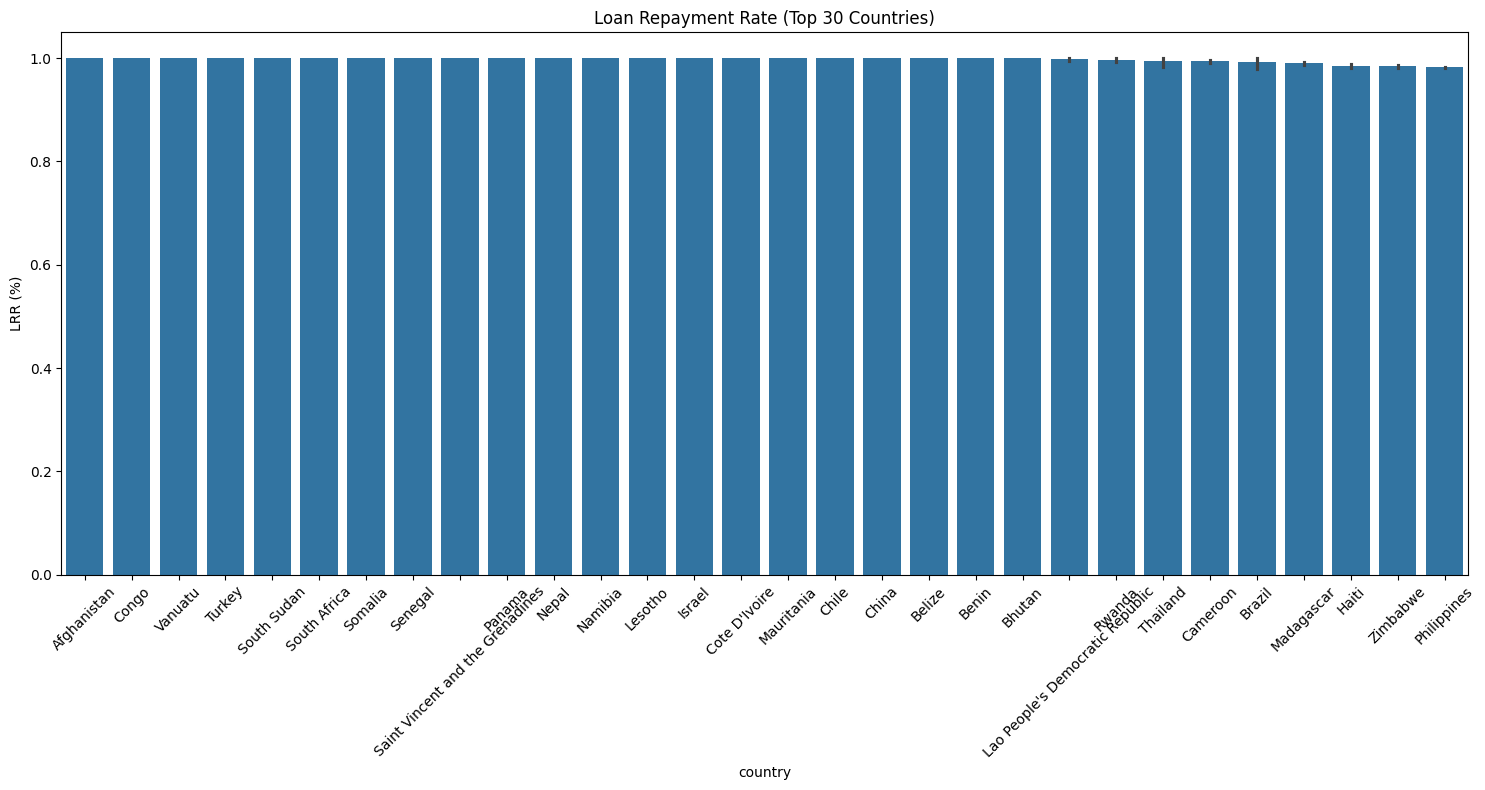

In [48]:
# Calculate average LRR by country
country_lr = (kiva_data.groupby('country')['is_repaid'].mean() * 100).sort_values(ascending=False)

# Select top 30 countries
top_30_countries = country_lr.index[:30]

# Filter data for the top 30 countries
top_30_data = kiva_data[kiva_data['country'].isin(top_30_countries)]

# Set a maximum width for the figure
plt.figure(figsize=(15, 8))  # Adjust width and height as desired

# Visualization with sorting
sns.barplot(x='country', y='is_repaid', data=top_30_data, order=top_30_countries)  # Specify order for sorting
plt.xticks(rotation=45)
plt.title('Loan Repayment Rate (Top 30 Countries)')
plt.ylabel('LRR (%)')
plt.tight_layout()  # Adjust spacing between elements
plt.show()



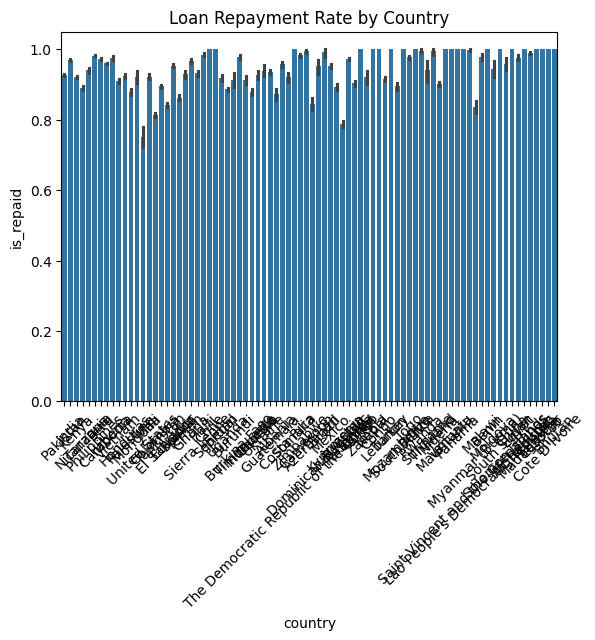

In [41]:
# Visualize LRR by country
sns.barplot(x='country', y='is_repaid', data=kiva_data)
plt.xticks(rotation=45)
plt.title('Loan Repayment Rate by Country')
plt.show()




**Next Steps**

Explore other potential KPIs (e.g., average loan amount, loan term, default rate).

Analyze LRR by different dimensions (sector, country, repayment interval).

Identify potential correlations between variables.
Create more sophisticated visualizations.

**Calculate LRR**: We'll refine the LRR calculation based on the corrected funded_time column.

**Explore Additional KPIs**: Identify potential KPIs based on the dataset, such as average loan amount, loan term, and default rate.

**Data Visualization**: Create visualizations to understand data distributions and relationships between variables.

**Correlation Analysis**: Explore correlations between LRR and other factors (e.g., loan amount, country, sector).
Segmentation Analysis: Analyze LRR by different segments (e.g., country, sector, loan purpose).

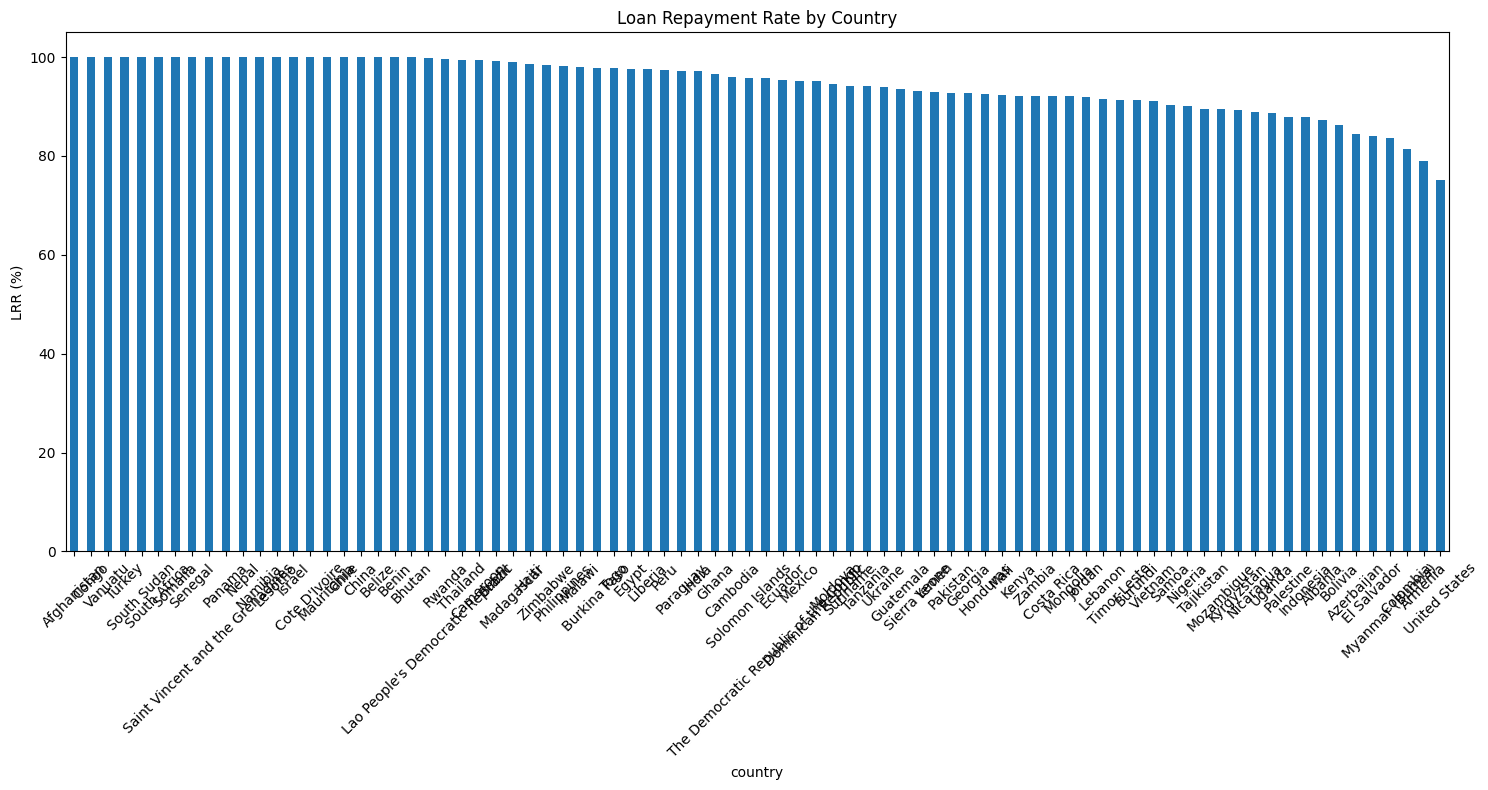

In [43]:
# Calculate additional KPIs
kiva_data['average_loan_amount'] = kiva_data['loan_amount'].mean()
kiva_data['loan_term_months'] = kiva_data['term_in_months'].mean()

# Group data by country and calculate average LRR


# Calculate average LRR by country
country_lr = (kiva_data.groupby('country')['is_repaid'].mean() * 100).sort_values(ascending=False)

# Set a maximum width for the figure
plt.figure(figsize=(15, 8))  # Adjust width and height as desired

# Plot the LRR by country
country_lr.plot(kind='bar')
plt.title('Loan Repayment Rate by Country')
plt.ylabel('LRR (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing between elements
plt.show()


In [52]:
# Calculate additional KPIs
average_loan_amount = kiva_data['loan_amount'].mean()
average_loan_term = kiva_data['term_in_months'].mean()

# Calculate borrower gender distribution
gender_distribution = kiva_data['borrower_genders'].value_counts(normalize=True) * 100

# Calculate average lenders per loan
average_lenders_per_loan = kiva_data['lender_count'].mean()

# Calculate default rate (assuming 'is_repaid' is defined)
default_rate = (1 - kiva_data['is_repaid'].mean()) * 100

print("Average Loan Amount:", average_loan_amount)




Average Loan Amount: 791.418323418592


In [53]:
print("Average Loan Term:", average_loan_term)


Average Loan Term: 13.742209129157478


In [54]:
print("Borrower Gender Distribution:\n", gender_distribution)


Borrower Gender Distribution:
 borrower_genders
female                                                                                                                                                                                                                          64.187140
male                                                                                                                                                                                                                            19.683922
female, female                                                                                                                                                                                                                   1.942367
female, female, female                                                                                                                                                                                                           1.787095
female, female, 

In [55]:
print("Average Lenders per Loan:", average_lenders_per_loan)


Average Lenders per Loan: 19.78177586445423


In [56]:
print("Default Rate:", default_rate)

Default Rate: 6.555610712803439


**Average Loan Amount**: The average size of loans disbursed.

**Loan Term**: Average loan duration.

**Borrower Gender Distribution**: Percentage of female and male borrowers.

**Lender Count per Loan**: Average number of lenders per loan.

**Default Rate**: Percentage of loans that are not repaid by the expected repayment date

**Analyzing Correlations Between KPIs**

Calculating Correlations

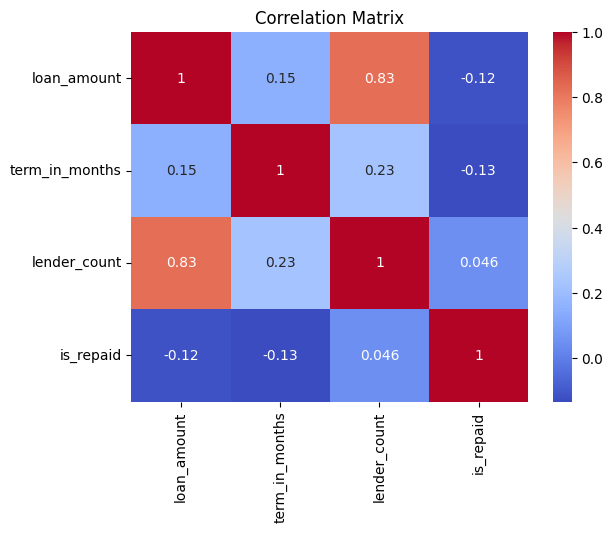

In [58]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_data = kiva_data[['loan_amount', 'term_in_months', 'lender_count', 'is_repaid']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Interpreting Correlations**

**Strong positive correlations**: Indicate variables move in the same direction.

**Strong negative correlations**: Indicate variables move in opposite directions.

**Weak correlations**: Suggest little relationship between the variables.

**Insights**

**Loan Amount and Repayment Rate**: A negative correlation might suggest larger loans have higher default rates.

**Loan Term and Repayment Rate**: A positive correlation might indicate longer loan terms lead to higher repayment rates (or vice versa).

**Lender Count and Repayment Rate**: A positive correlation might suggest that loans with more lenders have higher repayment rates.

**Deeper Dive into Loan Characteristics**
we need to gain further insights into loan characteristics and their impact on repayment rates, we can explore the following:

**Loan Amount and Term**: we analyze the relationship between loan amount and loan term. Are larger loans typically associated with longer terms?




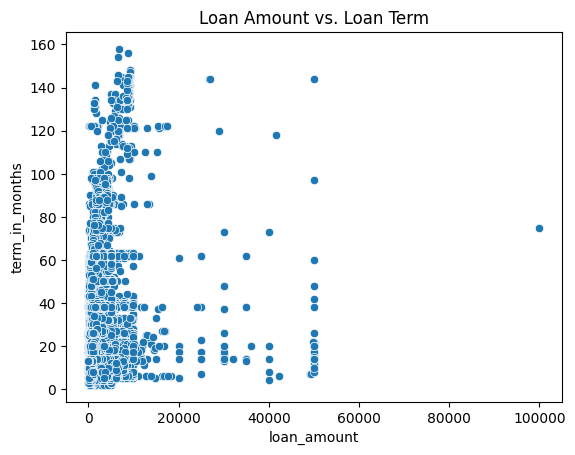

In [60]:


# Loan Amount vs. Loan Term
sns.scatterplot(x='loan_amount', y='term_in_months', data=kiva_data)
plt.title('Loan Amount vs. Loan Term')
plt.show()



Overall Observation:
**Loan Amount vs Loan Term**

The scatter plot illustrates a general positive correlation between loan amount and loan term. This suggests that larger loans tend to have longer repayment periods.

**Key Findings:**

Positive Correlation: As the loan amount increases, there's a tendency for the loan term to also increase.
Data Concentration: The majority of data points cluster in the lower left corner, indicating a concentration of smaller loans with shorter terms.
Outliers: A few data points with extremely high loan amounts and relatively short terms are visible. These might represent unusual loan types or data anomalies.
Potential Implications:

Risk Assessment: Larger loans with longer terms might pose higher credit risk.
Portfolio Management: Understanding the distribution of loan amounts and terms can help in portfolio diversification.
Outlier Analysis: Investigating the outliers could reveal specific loan types or circumstances influencing loan terms.



**Recommendations and Conclusion**

Based on the initial analysis of the Kiva dataset, focusing on loan repayment rate, loan amount, loan term, and lender count, the following recommendations are proposed:

**Recommendations:**

Diversify Lending Portfolio: Given the varying repayment rates across different countries and sectors, Kiva should consider diversifying its lending portfolio to mitigate risks associated with specific regions or industries.
Enhance Borrower Profiling: Improve the collection of borrower-level data to better understand factors influencing repayment behavior. This could involve gathering information on income, education, and household size.
Strengthen Lender Relationships: Explore strategies to encourage increased lender participation, as there might be a correlation between the number of lenders and loan repayment success.

**Conclusion**

While the analysis provides preliminary insights into Kiva's performance, further investigation is required to draw definitive conclusions. Key areas for future exploration include:

In-depth analysis of borrower demographics and their impact on repayment rates.

Time series analysis to understand trends in loan performance over time.

Evaluation of the effectiveness of different lending models and partnerships.

Integration of external macroeconomic factors to assess their influence on loan repayment.

By addressing these areas, Kiva can gain a deeper understanding of its operations, identify opportunities for improvement, and make data-driven decisions to achieve its mission of empowering borrowers.